# Simulación de Variables Aleatorias Continuas

### Método de la Función Inversa
Dada $F$ la función de distribución de una variable aleatoria $X$, diremos que su **inversa generalizada** es la función

$$F^{-1}(y) = \inf \{ x : F(x) \geq y\}$$

En caso de que $F$ sea biyectiva, entonces ésta coincide con la inversa usual.

 El Método de la función inversa asegura que si $U \sim U(0,1)$, entonces $F^{-1}(U) \sim X$. Para ver la demostración de este método se puede consultar el libro [A first course in Probability](https://www.pearson.com/en-us/subject-catalog/p/first-course-in-probability-a/P200000006334/9780137504589) de Sheldon Ross en la sección 10.2.1.

**Ejemplo 1**

Si $U \sim U(a,b)$, entonces $F_U(x) = \frac{x-a}{b-a}$ siempre que $x \in [a,b]$. Esta función es invertible en $[a,b]$ y su inversa es $F_U^{-1}(y) = (b-a)y+a$. Esto coincide con el pseudo-código para simular una variable aleatoria uniforme (a,b) de [VA1_NúmerosPseudoAleatorios](https://github.com/eliasegn/ProbabilidadI/blob/main/VA1_N%C3%BAmerosPseudoAleatorios.ipynb).

**Ejemplo 2**

Si $\lambda > 0$ y $X \sim exp(\lambda)$, entonces $F_X(x) = 1-e^{-\lambda x}$ siempre que $x \in (0, \infty)$. Esta función es invertible en su dominio y su inversa es $F_x^{-1}(y) = -\frac{1}{\lambda}\ln(1-y)$. Usando que si $U \sim U(0,1)$, entonces $1-U \sim U(0,1)$, tenemos que $-\frac{1}{\lambda}\ln(U) \sim exp(\lambda)$.

**Pseudo-Código para simular una variable aleatoria exponencial**

1. Simulamos $U \sim U(0,1)$.
2. Calculamos $X = -\frac{1}{\lambda}\ln(U) \sim exp(\lambda)$

Ahora implementamos este código

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
lam = 1
u = random.random() # Simulamos la uniforme
x = -(1/lam)*math.log(u) # Aplicamos la transformación
x

0.5037843728921598

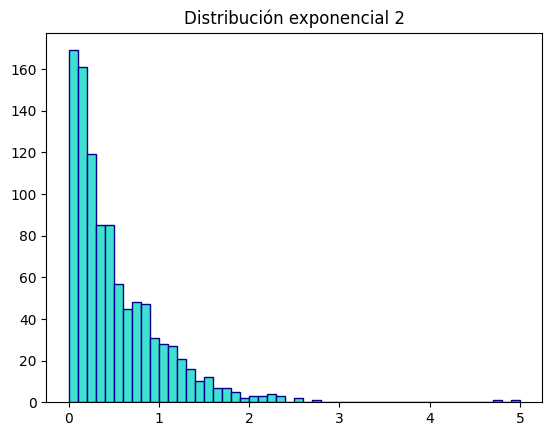

In [3]:
# Función para simular una v.a. exponencial
def simular_exp(lam):
  u = random.random()
  return -(1/lam)*math.log(u)

# Vemos el histograma de la muestra
lam = 2
N = 1000
xpoints = [simular_exp(2) for _ in range(N)]
plt.figure()
plt.hist(xpoints, bins = 50, edgecolor = 'darkblue', color = 'turquoise', align='mid')
plt.title(f'Distribución exponencial {lam}')
plt.show()

Podemos agregar a este histograma la función de densidad de la exponencial para ver que es una buena representación:

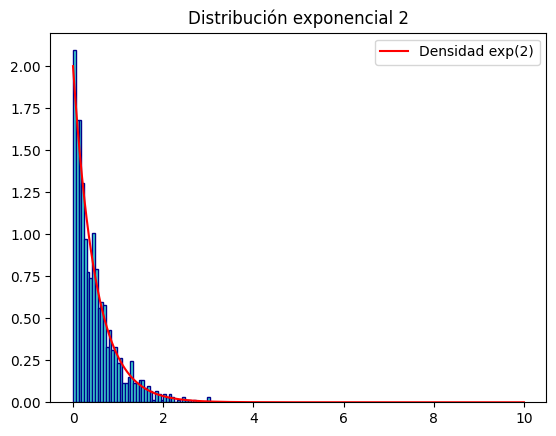

In [4]:
lam = 2 # Parámetro
N = 1000 # Tamaño de muestra
xpoints = [simular_exp(2) for _ in range(N)] # Muestra
plt.figure()
plt.hist(xpoints, bins = 50, edgecolor = 'darkblue', color = 'turquoise', align='mid', density = True)
x = np.linspace(0, 10, 200) # Dominio de la densidad
y = lam * np.exp(-lam * x) # Densidad
plt.plot(x, y, color='red', label=f'Densidad exp({lam})') # Gráfico de la densidad
plt.title(f'Distribución exponencial {lam}')
plt.legend()
plt.show()

Ahora hacemos una clase de la distribución

In [5]:
class Exponencial:
  def __init__(self, lam):
    '''
    lam: Parámetro de la distribución
    '''
    self.lam = lam

  def graficar(self, N = 1000, dens = True):
    plt.figure()
    xpoints = [simular_exp(self.lam) for _ in range(N)]
    plt.hist(xpoints, bins = 50, edgecolor = 'darkblue', color = 'turquoise', align='mid', density = True)
    if dens:
      x = np.linspace(0, 10, 200)
      y = self.lam * np.exp(-self.lam * x)
      plt.plot(x, y, color='red', label=f'Densidad exp({self.lam})')
    plt.title(f'Distribución exponencial {self.lam}')
    plt.legend()
    plt.show()

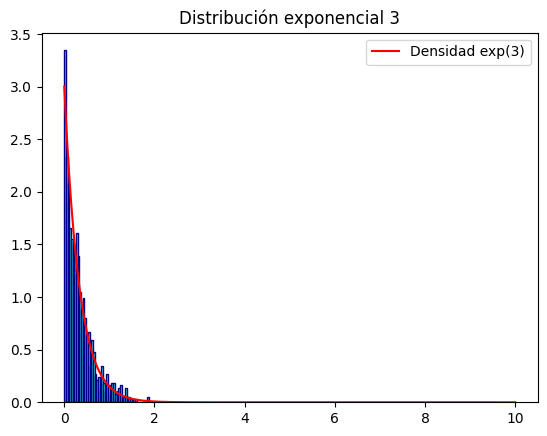

In [6]:
exp1 = Exponencial(3)
exp1.graficar()

/tmp/ipython-input-2768947376.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


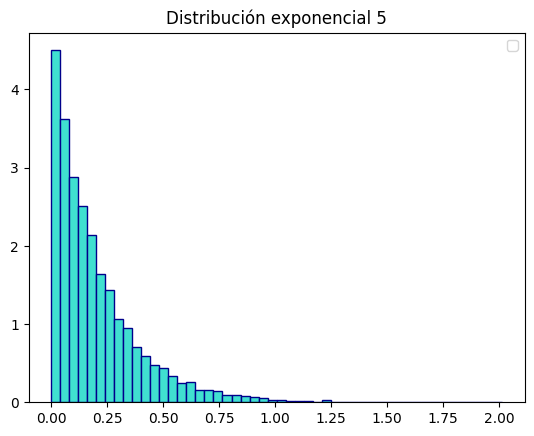

In [7]:
exp2 = Exponencial(5)
exp2.graficar(N = 10000, dens = False)

**Ejemplo 3**


Si $X \sim \text{Cauchy}(x_0, \gamma)$, entonces su función de distribución es:
$$F_X(x) = \frac{1}{\pi} \arctan\left(\frac{x - x_0}{\gamma}\right) + \frac{1}{2}$$

Esta función es invertible en su dominio $\mathbb{R}$ y su inversa es:
$$F_X^{-1}(y) = x_0 + \gamma \cdot \tan\left(\pi\left(y - \frac{1}{2}\right)\right)$$

Usando el método de la función inversa podemos generar una muestra de esta variable aleatoria

**Pseudo-Código para simular una variable aleatoria Cauchy$(x_0, \gamma)$**

1. Simulamos $U \sim U(0,1)$
2. Calculamos $X = x_0 + \gamma \cdot \tan\left(\pi\left(U - \frac{1}{2}\right)\right) \sim \text{Cauchy}(x_0, \gamma)$

Haremos una clase para esta variable aleatoria.

In [8]:
# Función para simular Cauchy
def simular_cauchy(x0=0, gamma=1):
    u = random.random()
    return x0 + gamma * math.tan(math.pi * (u - 0.5))

class Cauchy:
    def __init__(self, x0=0, gamma=1):
        '''
        x0: parámetro de localización
        gamma: parámetro de escala (>0)
        '''
        self.x0 = x0
        self.gamma = gamma

    def graficar(self, N=1000, dens=True, rango=(-10,10)):
        plt.figure()
        xpoints = [simular_cauchy(self.x0, self.gamma) for _ in range(N)] # simulamos valores de Cauchy
        plt.hist(xpoints, bins=100, density=True, edgecolor='darkblue',
                 color='turquoise', align='mid', alpha=0.7, range=rango) # graficamos el histograma

        if dens: # si esto es verdadero grafica la densidad también
            x = np.linspace(rango[0], rango[1], 500)
            y = 1/(math.pi * self.gamma * (1 + ((x - self.x0)/self.gamma)**2))
            plt.plot(x, y, color='red', label=f'Cauchy(x0={self.x0}, γ={self.gamma})')

        plt.title(f'Distribución Cauchy (x0={self.x0}, γ={self.gamma})')
        plt.legend()
        plt.show()


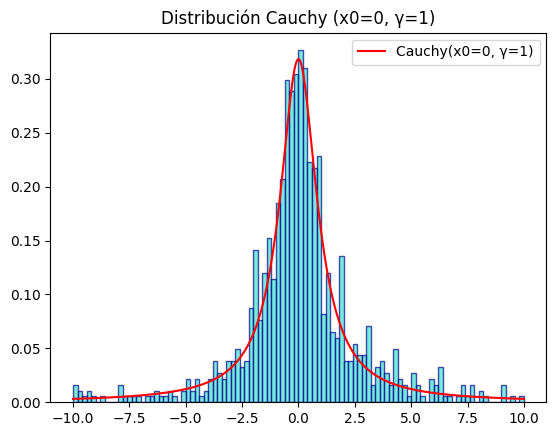

In [9]:
cauchy1 = Cauchy(x0=0, gamma=1)
cauchy1.graficar()

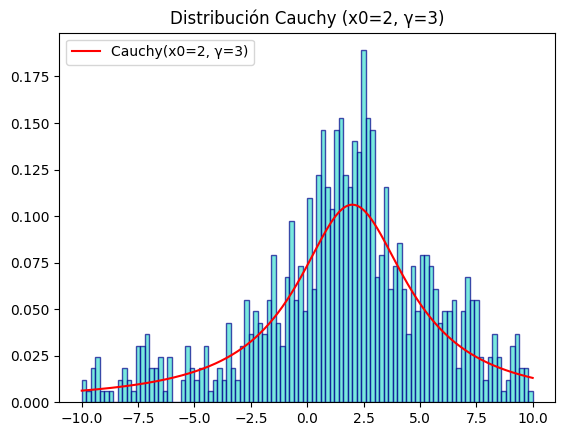

In [10]:
cauchy2 = Cauchy(x0=2, gamma=3)
cauchy2.graficar()

# Método de Aceptación-Rechazo
A continuación se presenta el método de aceptación-rechazo para simular variables aleatorias continuas. Para consultar la prueba y una discusión sobre este se puede consultar el libro [A first course in Probability](https://www.pearson.com/en-us/subject-catalog/p/first-course-in-probability-a/P200000006334/9780137504589) de Sheldon Ross en la sección 10.2.2.

**Pseudo-Código para simular usando Aceptación-Rechazo**

Supongamos que $g$ es una densidad que podemos simular. Nos interesa simular un número $Z$ con densidad $f$ donde existe $c > 0$ tal que $$\frac{f(x)}{g(x)} \leq c \text{ para toda } x$$

1. Simulamos $Y \sim g$ y $U \sim U(0,1)$.
2. Si $U \leq \frac{f(Y)}{cg(Y)}$, entonces Z=Y. En caso contrario, volvemos al paso 1.

Ahora simularemos un variable aleatoria normal estándar. Antes de eso, notemos que si $Y \sim exp(1)$, entonces
$$\frac{f(x)}{g(x)} \leq \sqrt{\frac{2e}{\pi}}$$
Por tanto, para el ejemplo usaremos $g$ como una distribución exponecial de parámetro 1 y a $c = \sqrt{\frac{2e}{\pi}}$.

In [17]:
# Parámetros del método
u = random.random()
Y = np.random.exponential(1)
c = math.sqrt(2*math.e/math.pi)

# Método de aceptación rechazo
while u >= c*math.exp(-Y**2):
  u = random.random()
  Y = np.random.exponential(1)
X = Y
X # imprimimos el valor

0.7173553805480293

Como la variable aleatoria exponencial es no negativa y la normal está definida en todo $\mathbb{R}$, entonces elegimos el signo de la variable, y será positiva o negativa con probabilidad $\frac{1}{2}$ para cada uno.

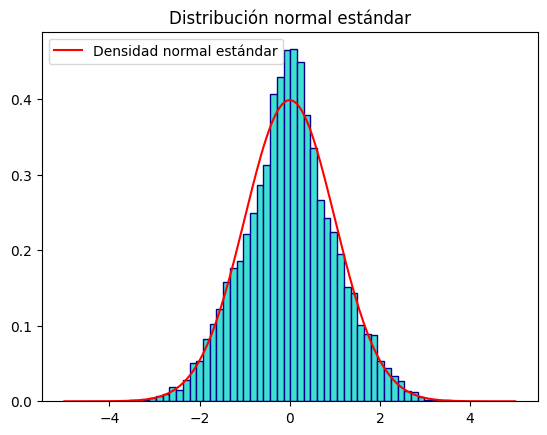

In [47]:
def ar_normal():
  # Parámetros del método
  u = random.random()
  Y = np.random.exponential(1)
  c = math.sqrt(2*math.e/math.pi)
  # Método de aceptación rechazo
  while u > c*math.exp(-(Y-1)**2/2):
    u = random.random()
    Y = np.random.exponential(1)
  # Elección del signo
  ber = np.random.binomial(1, 0.5)
  if ber == 0:
    X = Y
  else:
    X = -Y
  return X

# Graficamos los resultados
N = 10000
muestra_normal = [ar_normal() for _ in range(N)]
x = np.linspace(-5, 5, 200)
y = 1/math.sqrt(2*math.pi)*np.exp(-x**2/2)
plt.figure()
plt.hist(muestra_normal, density= True, bins = 50, edgecolor = 'darkblue', color = 'turquoise', align='mid') # Histograma de la muestra
plt.plot(x, y, color='red', label='Densidad normal estándar') # Densidad normal
plt.title(f'Distribución normal estándar')
plt.legend()
plt.show()

Una vez que tenemos una normal estándar $Z$, sabemos que si $\sigma, \mu \in \mathbb{R}$, entonces $\sigma Z + \mu \sim \mathcal{N}(\mu, \sigma^2)$. Con esta transformación ya podemos simular una variable aleatoria normal de cualesquiera parámetros.

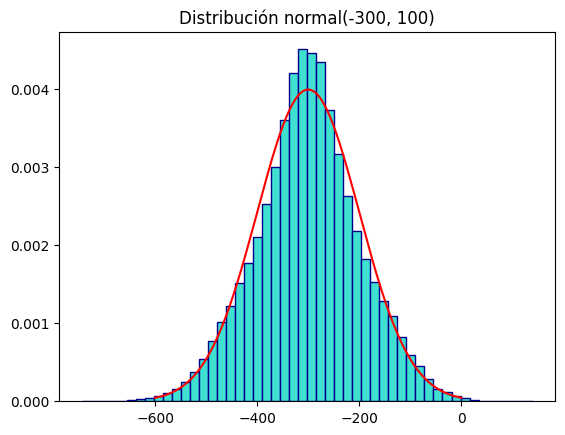

In [51]:
sigma = 100
mu = -300
N = 100000

# Simulamos una normal estándar y la transformamos
estandar = np.array([ar_normal() for _ in range(N)])
normal = sigma*estandar + mu

# Graficamos
xn = np.linspace(mu-3*sigma, mu+3*sigma, 200)
yn = 1/math.sqrt(2*math.pi*sigma**2)*np.exp(-(xn-mu)**2/(2*sigma**2))
plt.figure()
plt.hist(normal, density= True, bins = 50, edgecolor = 'darkblue', color = 'turquoise', align='mid')
plt.plot(xn, yn, color='red', label=f'Densidad normal({mu}, {sigma})')
plt.title(f'Distribución normal({mu}, {sigma})')
plt.show()

Finalmente, hacemos una clase para simular una variable aleatoria normal de cualesquiera parámetros.

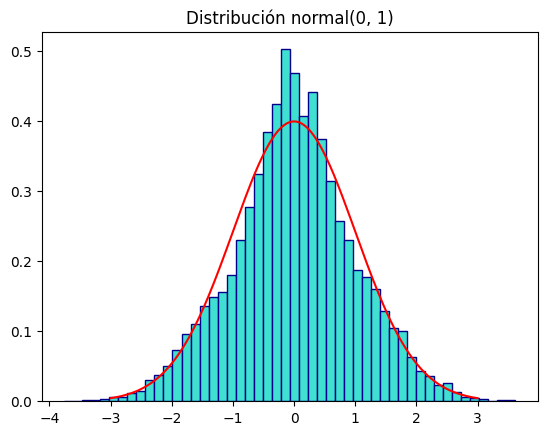

In [54]:
class Normal():

  def __init__(self, mu, sigma):
    '''
    mu: media de la normal
    sigma: desviación estándar de la normal
    '''
    self.mu = mu
    self.sigma = sigma

  def simular(self, N = 10000):
    estandar = np.array([ar_normal() for _ in range(N)])
    normal = self.sigma*estandar + self.mu
    return normal

  def graficar(self, N = 10000, dens = True):
    normal = self.simular(N)
    plt.figure()
    plt.hist(normal, density= True, bins = 50, edgecolor = 'darkblue', color = 'turquoise', align='mid')
    if dens:
      xn = np.linspace(self.mu-3*self.sigma, self.mu+3*self.sigma, 200)
      yn = 1/math.sqrt(2*math.pi*self.sigma**2)*np.exp(-(xn-self.mu)**2/(2*self.sigma**2))
      plt.plot(xn, yn, color='red', label=f'Densidad normal({self.mu}, {self.sigma})')
    plt.title(f'Distribución normal({self.mu}, {self.sigma})')
    plt.show()

n1 = Normal(0, 1)
n1.graficar()

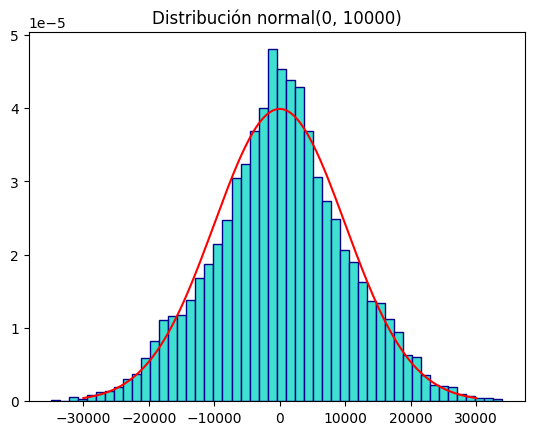

In [57]:
n2 = Normal(0, 10000)
n2.graficar()

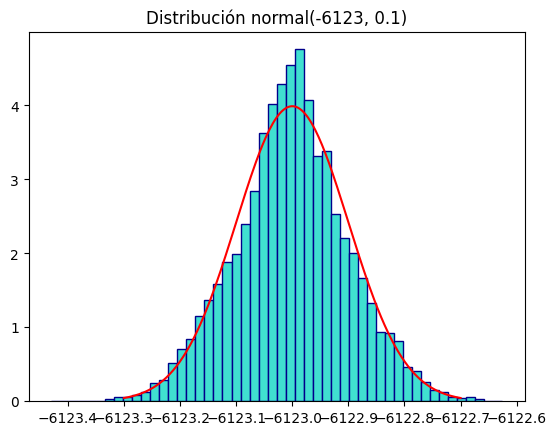

In [64]:
n3 = Normal(-6123, 0.1)
n3.graficar()